In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# from matplotlib import colors

In [2]:
df = pd.read_csv("C:\PyProjects\data\Stack Overflow Annual Developer Survey-2019/survey_results_public.csv", index_col="Respondent", usecols=["Respondent","MainBranch", "Country", "YearsCodePro", "WorkWeekHrs"]).dropna(how="any")
df["YearsCodePro"] = df["YearsCodePro"].str.replace('Less than 1 year','0')
df["YearsCodePro"] = df["YearsCodePro"].str.replace('More than 50 years','51')

df["MainBranch"] = df["MainBranch"].astype("category")
df["Country"] = df["Country"].astype("category")
df["YearsCodePro"] = df["YearsCodePro"].astype("int64")
df["WorkWeekHrs"] = df["WorkWeekHrs"].astype("int64")

df.sort_values(by="WorkWeekHrs", ascending=False, inplace=True)

df.head()

,MainBranch,Country,YearsCodePro,WorkWeekHrs
Respondent,,,,
55335,I am a developer by profession,India,2,4850
19460,I am a developer by profession,Switzerland,13,4125
34494,I am a developer by profession,Sweden,11,3875
5698,I am a developer by profession,Sri Lanka,8,1012
2145,I am a developer by profession,Turkey,5,475


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64286 entries, 55335 to 722
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   MainBranch    64286 non-null  category
 1   Country       64286 non-null  category
 2   YearsCodePro  64286 non-null  int64   
 3   WorkWeekHrs   64286 non-null  int64   
dtypes: category(2), int64(2)
memory usage: 1.7 MB


In [4]:
filt=(df["WorkWeekHrs"].sort_values(ascending=False)>=10) & (df["WorkWeekHrs"].sort_values(ascending=False)<=100)
df_clean = df.loc[filt]
df_clean.head()

,MainBranch,Country,YearsCodePro,WorkWeekHrs
Respondent,,,,
3365,I am a developer by profession,Slovenia,20,100
84307,I am a developer by profession,India,10,100
76231,I am a developer by profession,India,1,100
17423,I am a developer by profession,Pakistan,1,100
51502,I am a developer by profession,Australia,19,100


In [5]:
df_list = df_clean.groupby(["Country", "MainBranch"]).size().to_frame(name='count').reset_index()
top_countries = df_list.groupby("Country").sum().sort_values(by="count", ascending=False).head(9)
lists = list(top_countries.index)
lists

['United States',
 'India',
 'United Kingdom',
 'Germany',
 'Canada',
 'France',
 'Brazil',
 'Australia',
 'Poland']

In [6]:
df_1 = pd.DataFrame()
for i in range(0,len(lists)):
    data_1 = df_clean.groupby("Country").get_group(lists[i])
    df_1 = df_1.append(data_1)
df_1.head()

,MainBranch,Country,YearsCodePro,WorkWeekHrs
Respondent,,,,
8070,I am a developer by profession,United States,2,100
20629,I am a developer by profession,United States,5,100
84719,I am a developer by profession,United States,6,100
47354,"I am not primarily a developer, but I write co...",United States,7,100
25036,I am a developer by profession,United States,10,100


<h1 style='color:red'>FUNCTIONS</h1>

In [7]:
def country_salary(df,list_, nrows, ncols):
    for i in range(0,nrows):
        for j in range(0,ncols):
            df_country = df.groupby("MainBranch").get_group("I am a developer by profession").groupby("Country").get_group(list_[i][j])
            ax[i,j].scatter(df_country["YearsCodePro"], df_country["WorkWeekHrs"], edgecolor='black', linewidth=1, alpha=0.75)
            ax[i,j].set_xlim([0, max(df_country["YearsCodePro"])*1.1])
            ax[i,j].set_ylim([0, max(df_country["WorkWeekHrs"])*1.1])
            ax[i,j].set_title(list_[i][j])
            ax[i,j].set_xlabel('experience')
            ax[i,j].set_ylabel('salary')

<h1 style='color:red'>GRAPH</h1>

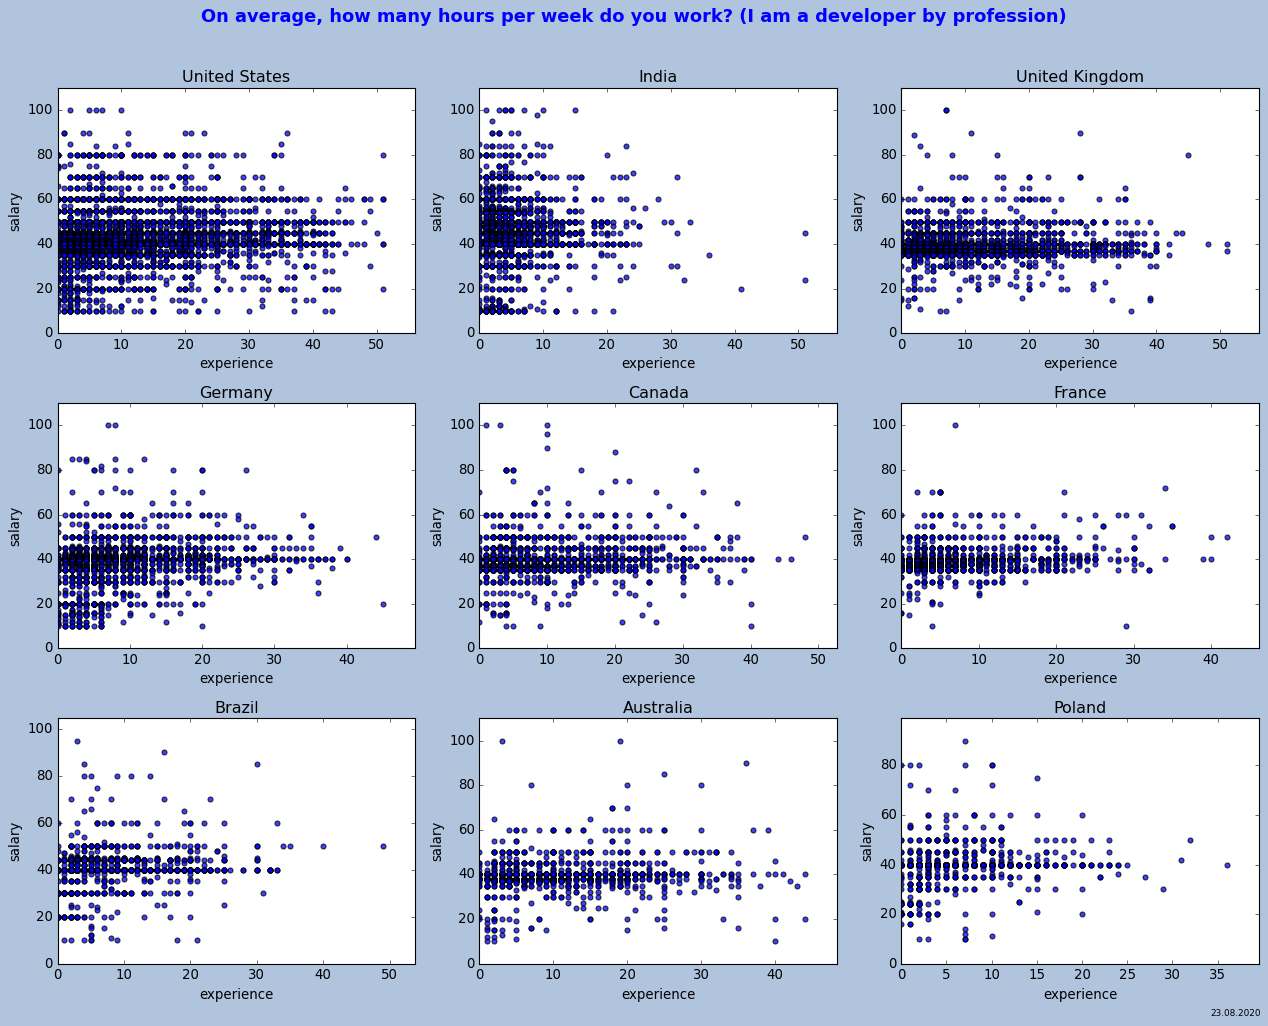

In [8]:
# %matplotlib inline
matplotlib.style.use('classic')

i=0
nested_list=[]
while i<len(lists):
  nested_list.append(lists[i:i+3])
  i+=3
nrows=len(nested_list)
ncols=len(nested_list[0])

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,12), facecolor='lightsteelblue')

country_salary(df_1, nested_list, nrows, ncols) #------function

fig.suptitle("On average, how many hours per week do you work? (I am a developer by profession)", fontsize=16, color='b', weight='bold').set_position([.5, 1.05])
plt.figtext(0.99, -0.0, "23.09.2020", horizontalalignment='right', size=8, weight='light')
plt.tight_layout()
plt.show()